In [12]:
!python prepare_data_spleen.py

In [67]:
from cnn.model import build_net
from cnn.input import Dataloader, SpleenDataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import random

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
  except RuntimeError as e:
    print(e)

In [ ]:
def train_test_split_on_patient_level()

In [68]:
# images_path = './Task09_Spleen/imagesTr/'
# labels_path = './Task09_Spleen/labelsTr/'

images_slices_path = './Task09_Spleen_2D/imagesTr'
labels_slices_path = './Task09_Spleen_2D/labelsTr'

image_size = 128
batch_size = 8
num_classes = 2

In [69]:
images_filepaths = [os.path.join(images_slices_path, filename) for filename in os.listdir(images_slices_path)]
labels_filepaths = [os.path.join(labels_slices_path, filename) for filename in os.listdir(labels_slices_path)]

images_filepaths.sort()
labels_filepaths.sort()

#train_images_filepaths, val_images_filepaths, train_labels_filepaths, val_labels_filepaths = train_test_split(images_filepaths, labels_filepaths, test_size=0.33, random_state=0)
idx = int(len(images_filepaths)*0.8)
train_images_filepaths = images_filepaths[0:idx]
train_labels_filepaths = labels_filepaths[0:idx]
val_images_filepaths = images_filepaths[idx:]
val_labels_filepaths = labels_filepaths[idx:]

train_dataset = SpleenDataset(train_images_filepaths, train_labels_filepaths)
val_dataset = SpleenDataset(val_images_filepaths, val_labels_filepaths)

train_dataloader = Dataloader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = Dataloader(val_dataset, batch_size=batch_size, shuffle=False)

In [70]:
len(train_dataset)

840

In [71]:
len(train_dataloader)

105

(256, 256, 1)
(256, 256, 1)


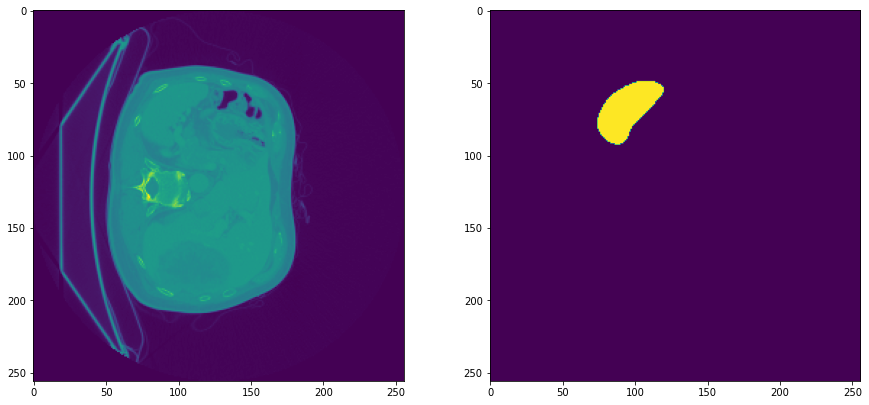

In [72]:
id = random.randint(0, len(train_dataset))
image, label = train_dataset[id]

print(image.shape)
print(label.shape)

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(label)

In [73]:
model = build_net((image_size, image_size, 1), num_classes, fn_dict=None, net_list=None)
#model.summary()

In [74]:
# from tensorflow.keras.utils import plot_model
# from IPython.display import Image

# plot_model(model,
#            to_file='model.png',
#            show_shapes=True,
#            show_layer_names=True,
#            rankdir='TB'
#             )
# Image('model.png')

In [75]:
history = model.fit(
    train_dataloader,
    validation_data=val_dataloader,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor="val_loss", mode="min", verbose=1, patience=3
        ),
        ModelCheckpoint(
            "best_model.h5",
            save_best_only=True,
            monitor="val_loss",
            mode="min",
        ),
        ReduceLROnPlateau(),
    ],
)

Epoch 1/100
105/105 [==============================] - 11s 83ms/step - loss: 0.9559 - gen_dice_coef: 0.0441 - val_loss: 0.9342 - val_gen_dice_coef: 0.0658 - lr: 1.0000e-04
Epoch 2/100
105/105 [==============================] - 8s 79ms/step - loss: 0.9209 - gen_dice_coef: 0.0791 - val_loss: 0.8995 - val_gen_dice_coef: 0.1005 - lr: 1.0000e-04
Epoch 3/100
105/105 [==============================] - 8s 81ms/step - loss: 0.8839 - gen_dice_coef: 0.1161 - val_loss: 0.8531 - val_gen_dice_coef: 0.1469 - lr: 1.0000e-04
Epoch 4/100
105/105 [==============================] - 8s 79ms/step - loss: 0.8224 - gen_dice_coef: 0.1776 - val_loss: 0.7712 - val_gen_dice_coef: 0.2288 - lr: 1.0000e-04
Epoch 5/100
105/105 [==============================] - 8s 79ms/step - loss: 0.7209 - gen_dice_coef: 0.2791 - val_loss: 0.6305 - val_gen_dice_coef: 0.3695 - lr: 1.0000e-04
Epoch 6/100
105/105 [==============================] - 8s 79ms/step - loss: 0.5214 - gen_dice_coef: 0.4786 - val_loss: 0.3860 - val_gen_dice_coe

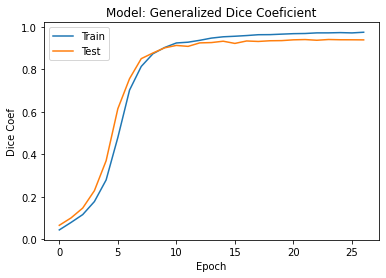

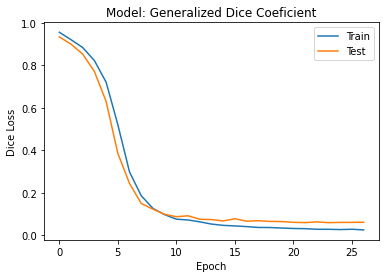

In [79]:
# plotting the dice coeff results (accuracy) as a function of the number of epochs
plt.figure()
plt.plot(history.history['gen_dice_coef'])
plt.plot(history.history['val_gen_dice_coef'])
plt.title('Model: Generalized Dice Coeficient')
plt.ylabel('Dice Coef')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plotting the dice coeff results (loss function) as a function of the number of epochs
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model: Generalized Dice Coeficient')
plt.ylabel('Dice Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [77]:
model.load_weights('best_model.h5')